In [1]:
#Import Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
print("Modules imported successfully!")

Modules imported successfully!


In [2]:
#Load the dataset and check its shape
df = pd.read_csv('bank-full.csv', sep=';')
print("Dataset loaded successfully!")

Dataset loaded successfully!


In [3]:
#Check no. of Rows and Columns
print("No. of Rows:", df.shape[0])
print("No. of Columns:", df.shape[1])
print("Shape: ",df.shape)

No. of Rows: 45211
No. of Columns: 17
Shape:  (45211, 17)


In [4]:
#First 5 rows
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
#Last 5 rows
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [6]:
#Checking the data type of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
#Stastical Info about Data
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
#No. of unique values in each feature
df.apply(lambda x: len(x.unique()))

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [9]:
#No. of null values in each feature
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
#Check for duplicate rows
df.duplicated().sum()

0

In [11]:
#Renaming target variable as deposit
df.rename(columns={'y': 'deposit'}, inplace=True)

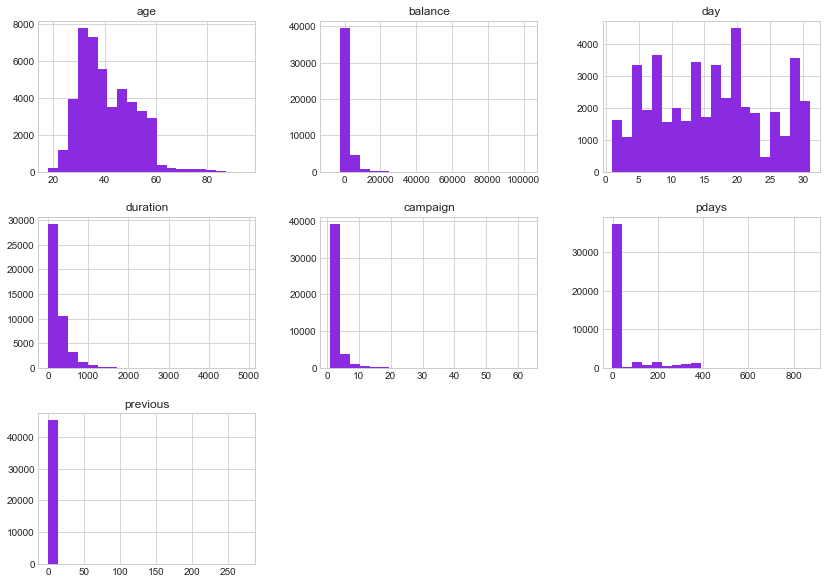

In [12]:
#Plotting histograms
plt.style.use('seaborn-whitegrid')
df.hist(bins=20, figsize=(14,10), color='#8A2BE2')
plt.show()

In [13]:
#Splitting the data in to feature and target variable
X = df.drop(columns='deposit')
y = df['deposit']

In [14]:
#Encoding categorical features
le = LabelEncoder()
y = le.fit_transform(y)
for col in X:
    if(X[col].dtype=='object'):
        X[col] = le.fit_transform(X[col])

In [15]:
#Splitting the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state=42)

In [16]:
#Encoding numerical features
sc = StandardScaler()
for col in X_train:
    X_train[col] = sc.fit_transform(X_train[col].values.reshape(-1,1))
    X_test[col] = sc.transform(X_test[col].values.reshape(-1,1))

In [17]:
#SVC Model
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [18]:
#Metrics
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8970805072250073


In [19]:
#Configuring the Confusion Matrix
cnf = confusion_matrix(y_test, y_pred)
cnf

array([[11736,   230],
       [ 1166,   432]], dtype=int64)

<AxesSubplot:>

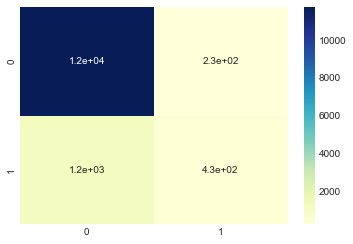

In [20]:
#Confusion Matrix
sns.heatmap(pd.DataFrame(cnf), annot=True, cmap='YlGnBu')